In [831]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit
import imp
import LQG
from LQG import tetrahedra_circuits as tc
from LQG import tetrahedra_num as tn
from LQG import tests
imp.reload(LQG.tetrahedra_circuits)
imp.reload(LQG.tetrahedra_num)
imp.reload(LQG.tests)

<module 'LQG.tests' from '/home/espresso/SynologyDrive/edu-resources/quantum-programming/csci-581-lqg/LQG/tests.py'>

In [832]:
''' test the circuit generation for arbitrary theta,phi
'''
for theta in [0.,np.pi,np.pi/2,np.pi/4]:
    for phi in [0.,np.pi/3,np.pi/2]:
        tests.test_init_vec(theta,phi)
''' test that the constant defined intertwiner states are correct
'''
tests.test_polarizations()  
''' are the polarized tetrahedra correct 
'''
tests.test_circuit_polarizations()

Testing theta,phi 0.0000, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 0.0000, 1.0472 -> overlap 1.0000, passed!
Testing theta,phi 0.0000, 1.5708 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 1.0472 -> overlap 1.0000, passed!
Testing theta,phi 3.1416, 1.5708 -> overlap 1.0000, passed!
Testing theta,phi 1.5708, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 1.5708, 1.0472 -> overlap 0.2500, failed! :(
Testing theta,phi 1.5708, 1.5708 -> overlap 0.0000, failed! :(
Testing theta,phi 0.7854, 0.0000 -> overlap 1.0000, passed!
Testing theta,phi 0.7854, 1.0472 -> overlap 0.6250, failed! :(
Testing theta,phi 0.7854, 1.5708 -> overlap 0.5000, failed! :(
passed!
passed!


1100 248
0011 259
1111 231
0000 262
Expectation |0>:  0.262


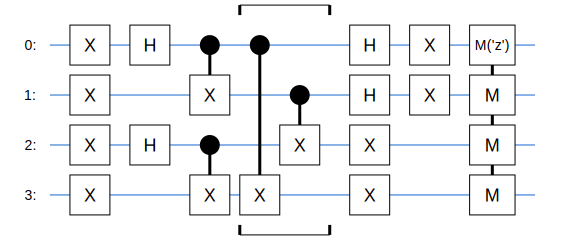

In [883]:
''' monopole spin starting in |0>
'''
N = 4
qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits))
circuit.append(tc.entangle_tets(qubits,[(0,3),(1,2)]))
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
reps = 1000
results = sim.run(circuit,repetitions=reps)
hist = results.histogram(key='z')

for key,item in hist.items():
    print(tc.binformat(N).format(key), item)

print('Expectation |0>: ', hist[0]/reps)

SVGCircuit(circuit)

In [884]:
''' monopole spin starting in |1>
'''
N = 4
reps = 1000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.OneTet(qubits))
circuit.append(tc.entangle_tets(qubits,[(0,3),(1,2)]))
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
results = sim.run(circuit,repetitions=reps)
hist = results.histogram(key='z')
for key,item in hist.items():
    print(tc.binformat(N).format(key),item)
    
print('Expectation |0>: ', hist[0]/reps)

0000 754
1111 86
1100 73
0011 87
Expectation |0>:  0.754


In [880]:
''' dipole spin starting in |0>
'''
N = 8
reps = 10000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,6),(3,7)]))
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
results = sim.run(circuit, repetitions=reps)
hist = results.histogram(key='z')

print('Expectation 0: ',hist[0]/reps)

Expectation 0:  0.0664


0.0153


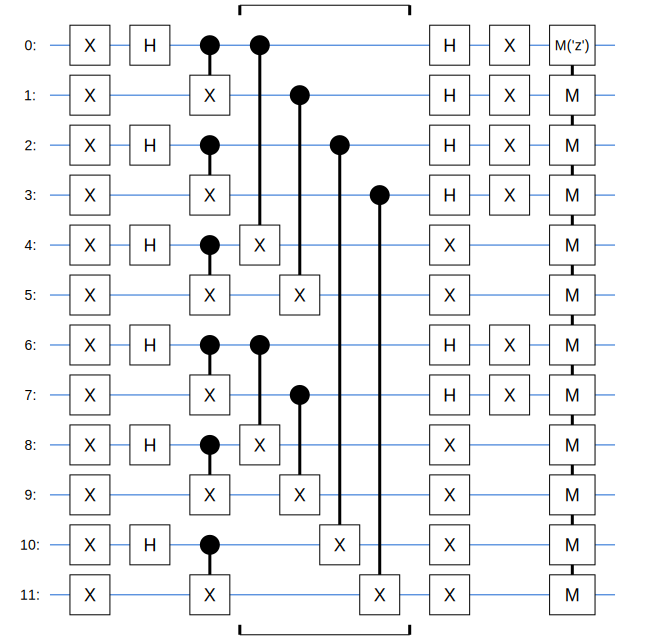

In [885]:
''' tripole spin
'''
N = 12
reps = 10000

qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit(tc.ZeroTet(qubits[:4]),tc.ZeroTet(qubits[4:8]),tc.ZeroTet(qubits[8:]))
circuit.append(tc.entangle_tets(qubits,[(0,4),(1,5),(2,10),(3,11),(6,8),(7,9)]))
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()
hist = sim.run(circuit,repetitions=reps).histogram(key='z')

print(hist[0]/reps)
SVGCircuit(circuit)

In [877]:
''' 20 maybe it will work 
'''
# 2^20 * 64 bits
N = 20
qubits = cirq.LineQubit.range(N)
circuit = cirq.Circuit([tc.ZeroTet(qubits[(i*4):(i*4+4)]) for i in range(5)])
#circuit = cirq.Circuit([tc.TetStatePrep(qubits[(i*4):(i*4+4)],(0,0)) for i in range(5)])
circuit.append(
    tc.entangle_tets(qubits, 
        [(3,4),(2,9),(6,13),(7,8),
         (10,17),(11,12),(14,1),
         (18,5),(19,0),(15,16)
        ]
    )
)
circuit.append(cirq.measure(*qubits,key='z'))

sim = cirq.Simulator()

hist = sim.run(circuit,repetitions=100000).histogram(key='z')
for key,item in hist.items():
    s = tc.binformat(20).format(key)
print(hist[0])

1


0


In [808]:
# <0|e>
#qubits = cirq.LineQubit.range(4)
#circuit = cirq.Circuit(tc.ZeroTet(qubits))
#circuit.append([cirq.H.on_each(qubits[:2]),cirq.X.on_each(qubits[:2])])
#b = tc.final_state(circuit)
#print(tn.overlap(b,tn.L_zero))
#
#
## <1|e>
#circuit = cirq.Circuit(tc.TetStatePrep(qubits,(2*np.pi/3,np.pi)))
#circuit.append(tc.apply(cirq.ISWAP**-.5, qubits,[(2,1),(3,0)]))
#b = tc.final_state(circuit)
#print(tn.overlap(b,tn.L_one))
#SVGCircuit(circuit)

0: ───PhXZ(a=0.917,x=0.276,z=-0.501)──────Rz(-0.25π)───PhXZ(a=-0.75,x=0,z=-0.75)───

1: ───PhXZ(a=0.895,x=2.22e-16,z=-0.166)───Rz(-0.25π)───PhXZ(a=1.0,x=0.5,z=0)───────


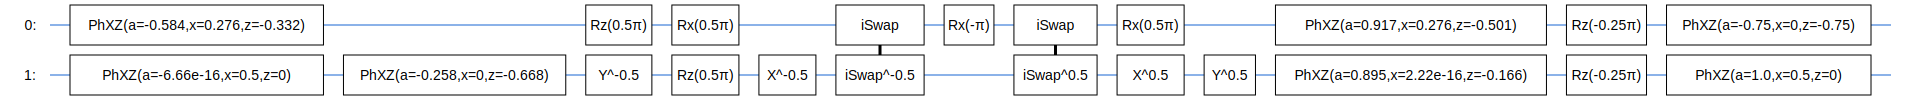

In [809]:
''' converting '''
q = cirq.LineQubit.range(2)
#c = cirq.Circuit(tc.UGate(0,0).on(q[0]))
c = cirq.Circuit(tc.CVGate(0,0).on(q[0],q[1]))
cirq.google.ConvertToSycamoreGates().optimize_circuit(c)
kept_1 = c[:2]
kept_2 = c[-3:]
c = cirq.Circuit(kept_1, cirq.CNOT(q[0],q[1]), kept_2)
print(kept_2)
cirq.google.ConvertToSqrtIswapGates().optimize_circuit(c)
SVGCircuit(c)

In [874]:
''' EPR Pair '''
Q = cirq.LineQubit.range(2)
print(tc.final_state([
        cirq.H(Q[0]),cirq.X(Q[0]),cirq.CNOT(Q[0],Q[1])
    ],True))

measurements: (no measurements)
output vector: 0.707|00⟩ + 0.707|11⟩
